<a href="https://colab.research.google.com/github/Yegeonhui/TIL/blob/main/tensorflow_dog_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from google.colab.patches import cv2_imshow

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
def get_image(image):
  image = cv2.imread(image)
  image = cv2.resize(image, dsize=(1000, 1000)) 

  return image

In [38]:
def get_dataset():
    random_arr = random.sample(range(0, 100), 100)
    for idx, (root, dirs, files) in enumerate(os.walk("gdrive/My Drive/Image")):
        type = os.path.split(root)[-1] 
        if type == 'dog':
            dog_list = [(os.path.join(root, img)) for img in files if img.lower().endswith('jpg')]  
        elif type == 'cat':
            cat_list = [(os.path.join(root, img)) for img in files if img.lower().endswith('jpg')]

    animal_list = dog_list + cat_list

    dog_label = [0 for i in range(50)]
    cat_label = [1 for i in range(50)]
    animal_label = dog_label + cat_label

    random_animal_list = [0 for i in range(100)]
    random_animal_label = [0 for i in range(100)]
    for num in range(100):
        image = animal_list[num]
        image = get_image(image)
        random_animal_list[random_arr[num]] = image
        random_animal_label[random_arr[num]] = animal_label[num]

    random_animal_list = np.array(random_animal_list, dtype = np.uint8)
    random_animal_labels = np.array(random_animal_label)

    train_images = random_animal_list[0:90, :, :, :]
    train_labels = random_animal_labels[0:90]

    test_images = random_animal_list[90:100, :, :, :]
    test_labels = random_animal_labels[90:100]

    return train_images, train_labels, test_images, test_labels

In [39]:
train_images, train_labels, test_images, test_labels = get_dataset()
class_names = ['dog', 'cat']

# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()  

In [40]:
train_images = train_images / 255.0
test_images = test_images /  255.0 

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

In [41]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(1000, 1000, 3)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n Test accuracy:", test_acc)

Epoch 1/10
3/3 [==============================] - 15s 3s/step - loss: 2237.8447 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 1435.0256 - accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 483.2635 - accuracy: 0.5111
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 443.0616 - accuracy: 0.5222
Epoch 5/10
3/3 [==============================] - 7s 2s/step - loss: 187.6936 - accuracy: 0.5111
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 88.0122 - accuracy: 0.5444
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 80.1175 - accuracy: 0.5333
Epoch 8/10
3/3 [==============================] - 7s 2s/step - loss: 55.2720 - accuracy: 0.6111
Epoch 9/10
3/3 [==============================] - 6s 2s/step - loss: 68.5980 - accuracy: 0.6000
Epoch 10/10
3/3 [==============================] - 7s 2s/step - loss: 53.2819 - accuracy: 0.5556
1/1 - 1s - loss: 29.2147 - accu

In [47]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.000000e+00, 4.021773e-09], dtype=float32)

In [44]:
np.argmax(predictions[0])

0

In [45]:
test_labels[0]

0

In [53]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

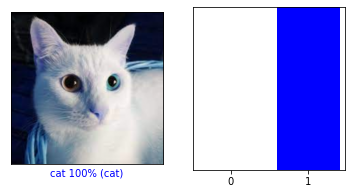

In [61]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

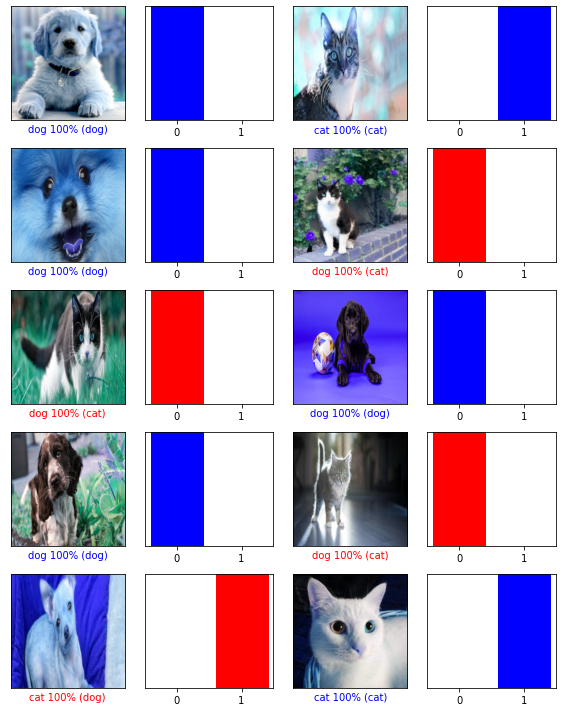

In [59]:
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [62]:
img = test_images[1]
print(img.shape)

(1000, 1000, 3)


In [63]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 1000, 1000, 3)


In [65]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.1648267e-23 1.0000000e+00]]


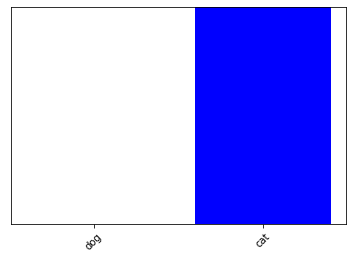

In [67]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(2), class_names, rotation=45)
plt.show()

In [68]:
np.argmax(predictions_single[0])

1